# Softmax Regression in Scikit-Learn
The class `LogisticRegression` can handle both binary and multi-class classification problems. It has a parameter called `multi_class` which by default is set to `auto`. The meaning of this option is that Scikit-Learn will automatically apply a softmax regression whenever it detects that the problem is multi-class and the chosen solver supports optimization of the multinomial loss.

## Classifying Handwritten Digits
Let's train a softmax regression model on the MNIST data set, which is a widely used data set for image classification tasks.

The data set contains $60,000$ training images and $10,000$ testing images of handwritten digits. Each image is $28 × 28$ pixels in size, and is typically represented by a vector of $784$ numbers in the range $[0, 255]$. The task is to classify these images into one of the ten digits $(0 - 9)$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

### Loading the Data Set
We first fetch the MNIST data set using the `fetch_openml()` function:

In [3]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False, parser='auto')

In [4]:
print(X.shape)

(70000, 784)


Let’s display the first 50 digits in the data set:

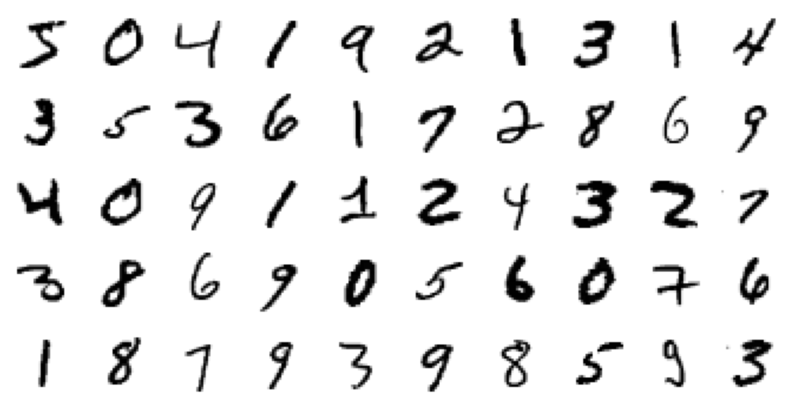

In [5]:
fig, axes = plt.subplots(5, 10, figsize=(10, 5))
i = 0
for ax in axes.flat:
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.axis('off')    
    i += 1

## Scaling
We scale the inputs to be within the range $[0, 1]$ instead of $[0, 255]$. Feature scaling is important whenever we use an iterative optimization method such as gradient descent to train our model.

In [6]:
X = X / 255

## Test / Train Split
We now split the data into training and test sets. Note that the first 60,000 images in MNIST are already designated for training, so we can just use simple slicing for the split.

In [7]:
train_size = 60000
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

## Building the Model
We now create a `LogisticRegression` classifier with its default settings and fit it to the training set.

In [9]:
# Increase the max number of iterations to 1000 (default = 100)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# iterations needed for convergence
print(clf.n_iter_)

[831]


## Evaluating the Model
The accuracy of the model on the training and the test sets is:

In [11]:
print('Training set accuracy: ', np.round(clf.score(X_train, y_train), 4))
print('Test set accuracy:' , np.round(clf.score(X_test, y_test), 4))

Training set accuracy:  0.9393
Test set accuracy: 0.9256


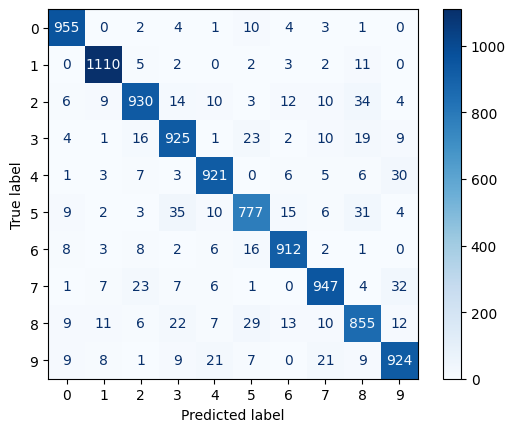

In [12]:
y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

We can see that the main confusions of the model are between the digits $5 \leftrightarrow 8$ and $4 \leftrightarrow 9$. This makes sense since these digits often resemble each other when written by hand. To help our model distinguish between these digits, we can add more examples from these digits (e.g., by using data augmentation) or extract additional features from the images (e.g., the number of closed loops in the digit).

In [13]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



As expected, the digits that the model gets the lowest scores on are 5 and 8.

## Visualizing the Weights
One of the advantages of softmax regression is that it is highly interpretable. The weight associated with each feature represents the importance of that feature.

For example, we can plot the weights associated with each pixel in each one of the digit classes ($w_j$ for each $j \in {1 \cdots 10}$). This will show us the important segments in the images that are used to detect each digit.

In [14]:
# the weight matrix of the model is stored in attribute coef_
print(clf.coef_.shape)

(10, 784)


Row $i$ of this matrix contains the learned weights of the model for class $i$. We can display each row as a $28 × 28$ pixels image in order to examine the weights associated with each pixel in each one of the classes:

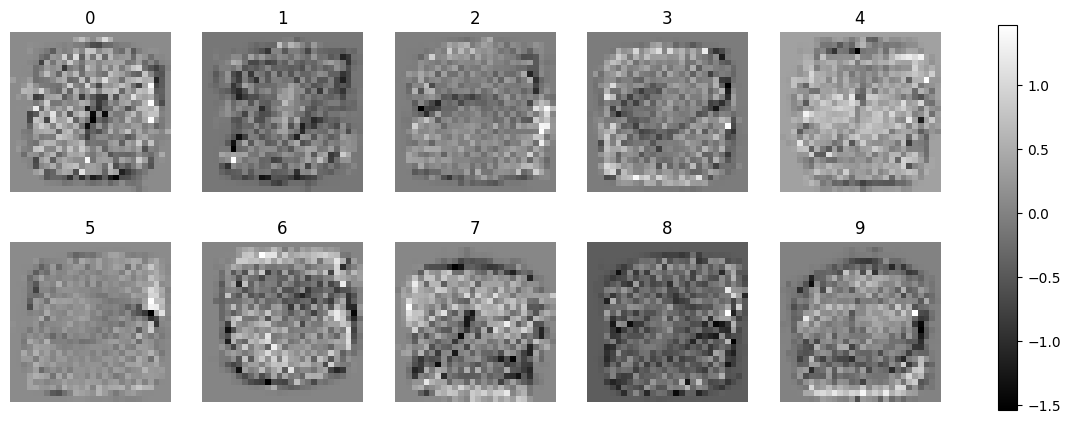

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

digit = 0
for coef, ax in zip(clf.coef_, axes.flat):
    im = ax.imshow(coef.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(str(digit))
    digit += 1
    
fig.colorbar(im, ax=axes.flat)

Pixels with bright shades have a positive impact on the prediction while pixels with dark shades have a negative impact. Pixels with a gray level around 0 have no influence on the prediction (such as the pixels close to the border of the image).